## Generación de variables aleatorias correlacionadas

In [3]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from mcerp import correlate, correlation_matrix
from mcerp import Beta, N, Exp, PERT
from mcerp import uv, stats

from scipy import stats as stats
from scipy.stats import rv_continuous, beta, genextreme, rv_histogram
import scipy.optimize as opt

import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

np.set_printoptions(precision=3, suppress=True)
pd.options.display.float_format = '{:.3f}'.format



In [4]:
# parametros de las distribuciones:
min, mode, max, lmb = 8000.0, 12000.0, 18000.0, 4.0         # volumen de ventas (distribución PERT)
ms, ss = 20.0, 1.0                                          # precio de venta (dist normal)
mm, sm = 13.0, 0.7                                          # costo unitario de material (dist normal)
o = 3.0                                                     # otro costo unitario (deterministico)

In [5]:
# variables aleatorias  de entrada a la simulación:
v1 = PERT(min, mode, max, lmb)                  # volumen de ventas (distribución PERT)
p1 = N(ms, ss)                                  # precio de venta (dist normal)
m1 = N(mm, sm)                                  # costo unitario de material (dist normal)
o1 = o                                          # otro costo unitario (deterministico)


# variables de salida (modelos matemático):
GP1 = v1 * (p1 - m1 - o1)                       # utilidad bruta
R1 = v1 * p1                                    # ingresos totales
GM1 = GP1 / R1                                  # margen bruto
C1 = R1 - GP1                                   # costos totales

In [ ]:
#npts = 10

In [6]:
# Ejecucion de la simulacion

# generación de números aleatorios 
rv1 = v1._mcpts
rp1 = p1._mcpts
rm1 = m1._mcpts
rGP1 = GP1._mcpts
rR1 = R1._mcpts
rGM1 = GM1._mcpts

# combinar resultados en un arregloe
rand1 = np.vstack((rv1, rp1, rm1, rGP1, rR1, rGM1))

# crear dataframe
df1 = pd.DataFrame(data=rand1).T 
df1.rename(columns={ 
    0:"Volumen", 1:"Precio", 2:"Costo material", 3:"Utilidad bruta", 4:"Ingresos", 5:"Margen bruto"}, 
    inplace=True)
df1


,Volumen,Precio,Costo material,Utilidad bruta,Ingresos,Margen bruto
0,14316.036,21.209,13.022,74254.061,303622.003,0.245
1,12669.278,19.731,10.729,76034.634,249971.784,0.304
2,14616.760,20.013,12.721,62735.177,292518.596,0.214
3,12624.669,22.213,12.637,83027.400,280434.676,0.296
4,8631.823,20.566,12.790,41221.182,177519.195,0.232
...,...,...,...,...,...,...
9995,15025.418,19.539,12.562,59756.189,293582.801,0.204
9996,14963.360,21.787,11.937,102496.947,326004.143,0.314
9997,11866.460,22.901,13.853,71769.921,271754.221,0.264
9998,10533.544,19.624,12.751,40802.665,206713.738,0.197


In [7]:
# función para histogramas
def plot_hist(data, title):
    hist = np.histogram(data, bins=100)
    histdist = rv_histogram(hist)

    X = np.linspace(data.min(), data.max(), 100)
    plt.title(title)
    plt.hist(data, density=False, bins=100)
    plt.plot(X, histdist.pdf(X))
    plt.show()

In [8]:
# momentos de variables de entrada
def input_moments(v, p, m):
    print("volumen ventas:")
    v1.describe()
    print("precio de venta:")
    p1.describe()
    print("costo unitario de material:")
    m1.describe()

In [9]:
# smomentos de variables de salida 
def output_moments(GP, R, GM, C):
    print("Utilidad bruta:")
    GP1.describe()
    print("Ingresos:")
    R1.describe()
    print("Margen bruto:")
    GM1.describe()
    print("Costo total:")
    C1.describe()

In [10]:
# momentos de variables de entrada
inmom1 = input_moments(v1, p1, m1)
inmom1

volumen ventas:
MCERP Uncertain Value:
 > Mean...................  12333.332968887025
 > Variance...............  3507931.713432389
 > Skewness Coefficient...  0.17793298673405739
 > Kurtosis Coefficient...  2.3754755565503363

precio de venta:
MCERP Uncertain Value:
 > Mean...................  20.00005063492804
 > Variance...............  0.9999691126209884
 > Skewness Coefficient...  0.0022087083976962654
 > Kurtosis Coefficient...  3.0003275630728727

costo unitario de material:
MCERP Uncertain Value:
 > Mean...................  12.999938930856903
 > Variance...............  0.49032193080216147
 > Skewness Coefficient... -0.00505347366044863
 > Kurtosis Coefficient...  3.0222902150031064



In [11]:
# momentos de variables de salida
outmom1 = output_moments(GP1, R1, GM1, C1)
outmom1

Utilidad bruta:
MCERP Uncertain Value:
 > Mean...................  49337.37817804956
 > Variance...............  290778850.4130393
 > Skewness Coefficient...  0.3235388578681503
 > Kurtosis Coefficient...  3.231325548716749

Ingresos:
MCERP Uncertain Value:
 > Mean...................  246645.34508606006
 > Variance...............  1545965366.8453317
 > Skewness Coefficient...  0.22493460435098936
 > Kurtosis Coefficient...  2.526848558988126

Margen bruto:
MCERP Uncertain Value:
 > Mean...................  0.19796488040803614
 > Variance...............  0.0029100814239305123
 > Skewness Coefficient... -0.2431254232970504
 > Kurtosis Coefficient...  3.1697518981802446

Costo total:
MCERP Uncertain Value:
 > Mean...................  197307.96690801048
 > Variance...............  964239809.3452297
 > Skewness Coefficient...  0.21898706213788288
 > Kurtosis Coefficient...  2.481446544136648



In [12]:
mean1 = GP1.mean
std1 = GP1.std
skew1 = GP1.skew
kurt1 = GP1.kurt
moments1 = [mean1, std1, skew1, kurt1]

In [13]:
# matriz de correlación INICIAL
c1 = correlation_matrix([v1, p1, m1])
c1

array([[ 1.   , -0.012, -0.019],
       [-0.012,  1.   , -0.014],
       [-0.019, -0.014,  1.   ]])

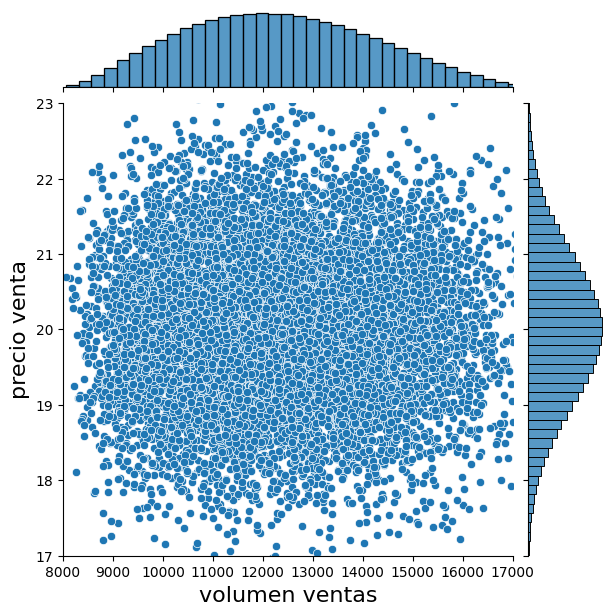

In [14]:
h = sns.jointplot(x=rv1, y=rp1, kind='scatter', xlim=(8000, 17000), ylim=(17, 23))
h.set_axis_labels('volumen ventas', 'precio venta', fontsize=16);

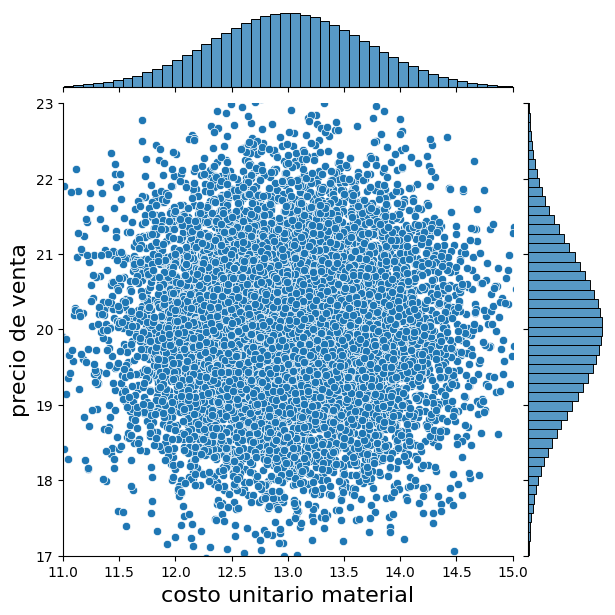

In [15]:
h = sns.jointplot(x=rm1, y=rp1, kind='scatter', xlim=(11, 15), ylim=(17, 23))
h.set_axis_labels('costo unitario material', 'precio de venta', fontsize=16);

In [ ]:
v1

uv(12333.324452716763, 3507860.0438797674, 0.1779212783048169, 2.375360498071707)

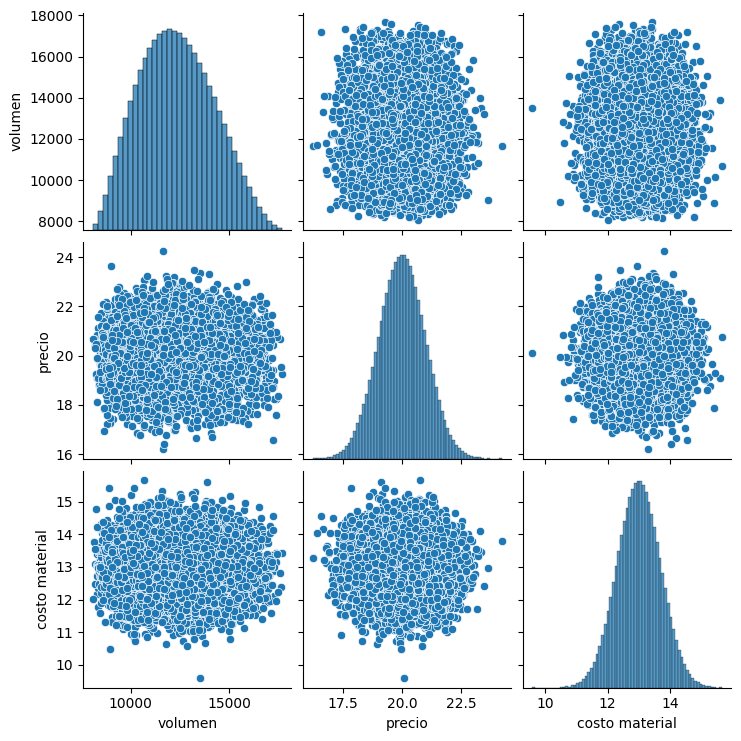

In [16]:
# gráfico de datos iniciales (no correlacionados) 
data0 = pd.DataFrame()
data0["volumen"] = rv1
data0["precio"] = rp1
data0["costo material"] = rm1

sns.pairplot(data=data0);

In [ ]:
# matriz de correlación objetivo: volumen, precio, costo unitario de material
c_target = np.array(    [[  1.0, -0.5,  0.2],
                        [  -0.5,  1.0,  0.7],
                        [   0.2,  0.7,  1.0]])

In [ ]:
v2 = PERT(min, mode, max, lmb)                  # sales volume, PERT distributed
p2 = N(ms, ss)                                  # selling price, normally distributed
m2 = N(mm, sm)                                  # material unit cost, normally distributed 
o2 = o                                          # other unit cost, deterministic    

In [ ]:
# correlacionar variables de entrada 
correlate([v2, p2, m2], c_target)

In [ ]:
# variables de salida (modelos matemático):
GP2 = v2 * (p2 - m2 - o2)                       # utilidad bruta
R2 = v2 * p2                                    # ingresos totales
GM2 = GP2 / R2                                  # margen bruto
C2 = R2 - GP2                                   # costos totales

In [ ]:
# revisar matriz de correlación
c2 = correlation_matrix([v2, p2, m2])
c2

array([[ 1.   , -0.498,  0.199],
       [-0.498,  1.   ,  0.7  ],
       [ 0.199,  0.7  ,  1.   ]])

In [ ]:
# desviación del objetivo
c2 - c_target

array([[-0.   ,  0.002, -0.001],
       [ 0.002,  0.   , -0.   ],
       [-0.001, -0.   ,  0.   ]])

In [ ]:
# cambio comparado con la c1
c2 - c1

array([[-0.   , -0.505,  0.211],
       [-0.505,  0.   ,  0.694],
       [ 0.211,  0.694,  0.   ]])

In [ ]:
# generación de números aleatorios
rv2 = v2._mcpts
rp2 = p2._mcpts
rm2 = m2._mcpts
rGP2 = GP2._mcpts
rR2 = R2._mcpts
rGM2 = GM2._mcpts

# arreglo
rand2 = np.vstack((rv2, rp2, rm2, rGP2, rR2, rGM2))


# dataframe
df2 = pd.DataFrame(data=rand2).T 
df2.rename(columns={ 
    0:"Volumen", 1:"Precio", 2:"Costo material", 3:"Utilidad bruta", 4:"Ingresos", 5:"Margen bruto"}, 
    inplace=True)
df2

,Volumen,Precio,Costo material,Utilidad bruta,Ingresos,Margen bruto
0,13678.324,17.982,11.790,43667.036,245970.143,0.178
1,15516.132,19.714,13.655,47467.374,305883.072,0.155
2,12914.172,19.113,12.941,40959.990,246828.164,0.166
3,11545.883,20.409,13.098,49776.769,235643.507,0.211
4,10247.183,20.848,13.131,48343.396,213636.437,0.226
...,...,...,...,...,...,...
9995,10393.467,19.832,12.204,48108.223,206125.491,0.233
9996,12776.821,18.886,12.129,48008.335,241306.139,0.199
9997,9791.546,19.905,12.630,41854.780,194897.613,0.215
9998,11859.600,20.409,13.188,50048.520,242037.029,0.207


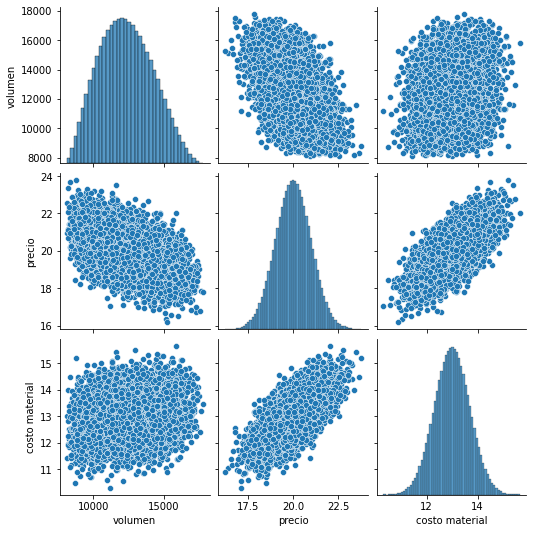

In [ ]:
# plot updated data (correlated)
datac = pd.DataFrame()
datac["volumen"] = rv2
datac["precio"] = rp2
datac["costo material"] = rm2

sns.pairplot(data=datac);

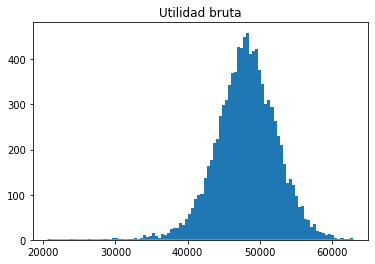

In [ ]:
# histograma de utilidad bruta
plot_hist(rGP2, "Utilidad bruta");

In [ ]:
# comparar momentos de las variables de salida de las dos simulaciones
nombres_momentos = ["media", "desv_est", "asim", "curt"]
moments2 = [GP2.mean, GP2.std, GP2.skew, GP2.kurt]

df = pd.DataFrame([moments1, moments2], columns=nombres_momentos).T
df.rename(columns={0:"indep", 1:"corr"}, inplace=True)
df["cambio"] = df["corr"] - df["indep"] 
df["%cambio"] = df["corr"] / df["indep"] 
print("Impacto de la correlación en la estimación de la utilidad bruta:")
df

Impacto de la correlación en la estimación de la utilidad bruta:


,indep,corr,cambio,%cambio
media,49363.184,48141.386,-1221.798,0.975
desv_est,17063.253,4203.725,-12859.528,0.246
asim,0.378,-0.284,-0.662,-0.752
curt,3.255,4.094,0.839,1.258


In [ ]:
# cuantiles de la utilidad bruta:
q1 = np.array([0.001, 0.01, 0.99, 0.999])
q2 = np.arange(0.05, 0.95, 0.05)
q = np.concatenate((q1,q2))
q.sort()
xq1 = np.quantile(rGP1, q)
xq2 = np.quantile(rGP2, q)

qstr = [str(f'{v:.3f}') for v in q]
print("\ncuantiles:indep - corr")
_ = [print("{:.3f} : {:.0f} - {:.0f}".format(a, xq1[i], xq2[i])) for i,a in enumerate(q)]


cuantiles:indep - corr
0.001 : 2277 - 30214
0.010 : 13307 - 37234
0.050 : 23641 - 41274
0.100 : 28543 - 42995
0.150 : 32225 - 44068
0.200 : 34907 - 44862
0.250 : 37546 - 45559
0.300 : 39797 - 46171
0.350 : 42060 - 46732
0.400 : 43983 - 47236
0.450 : 46011 - 47729
0.500 : 48076 - 48207
0.550 : 50315 - 48682
0.600 : 52458 - 49179
0.650 : 54755 - 49681
0.700 : 57296 - 50230
0.750 : 60225 - 50859
0.800 : 63320 - 51572
0.850 : 66967 - 52300
0.900 : 71628 - 53321
0.990 : 95023 - 57787
0.999 : 109744 - 60933


## Punto 2
En una misma gráfica incluya los histogramas de los casos independiente y correlacionado

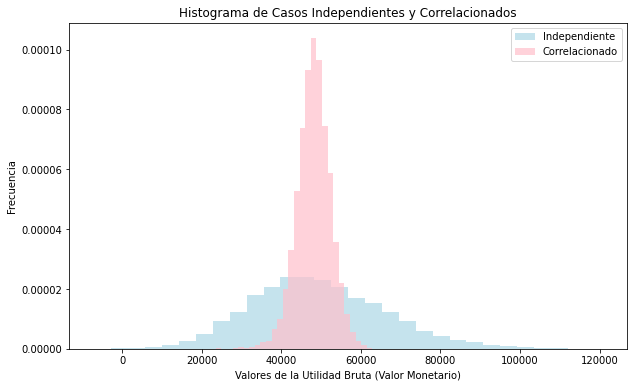

In [ ]:
# Configurar el tamaño de la figura
plt.figure(figsize=(10, 6))

# Crear histograma para casos independientes y correlacionados en la misma gráfica
plt.hist(rGP1, bins=30, color='lightblue', alpha=0.7, label='Independiente',density=True)
plt.hist(rGP2, bins=30, color='pink', alpha=0.7, label='Correlacionado', density=True)

# Añadir leyenda, título y etiquetas
plt.legend()
plt.title('Histograma de Casos Independientes y Correlacionados')
plt.xlabel('Valores de la Utilidad Bruta (Valor Monetario)')
plt.ylabel('Frecuencia')

# Mostrar la gráfica
plt.show()

In [ ]:
# Crear un DataFrame de Pandas con la descripción de las variables
data = {
    'Casos Independientes': rGP1,
    'Casos Correlacionados': rGP2
}

df = pd.DataFrame(data)

# Obtener la descripción de las variables
description = df.describe()

# Imprimir la tabla con la descripción
pd.DataFrame(description)


,Casos Independientes,Casos Correlacionados
count,10000.000,10000.000
mean,49363.184,48141.386
std,17064.106,4203.935
min,-6985.495,20684.996
25%,37545.745,45559.003
50%,48076.258,48206.984
75%,60224.631,50859.203
max,120523.001,62892.428


## Punto 3
Realice un análisis de sensibilidad de la correlación. Seleccione 3 configuraciones diferentes de la matriz de correlaciones, realice la simulación y analice el impacto de la correlación en las variables resultado.

In [ ]:
# matriz de correlación objetivo: volumen, precio, costo unitario de material
def sens_mat(c_target_cal): 
    v_ = PERT(min, mode, max, lmb)                  # sales volume, PERT distributed 
    p_ = N(ms, ss)                                  # selling price, normally distributed 
    m_ = N(mm, sm)                                  # material unit cost, normally distributed  
    o_ = o                                          # other unit cost, deterministic
    # correlacionar variables de entrada  
    correlate([v_, p_, m_], c_target_cal) 
    # variables de salida (modelos matemático): 
    GP_ = v_ * (p_ - m_ - o_)                       # utilidad bruta 
    R_ = v_ * p_                                    # ingresos totales 
    GM_ = GP_ / R_                                  # margen bruto 
    C_ = R_ - GP_                                  # costos totales 
    # revisar matriz de correlación 
    c_ = correlation_matrix([v_, p_, m_]) 
    # generación de números aleatorios 
    rv_ = v_._mcpts 
    rp_ = p_._mcpts 
    rm_ = m_._mcpts 
    rGP_ = GP_._mcpts 
    rR_ = R_._mcpts 
    rGM_ = GM_._mcpts 
    # arreglo 
    rand_ = np.vstack((rv_, rp_, rm_, rGP_, rR_, rGM_)) 
    # dataframe 
    df_ = pd.DataFrame(data=rand_).T  
    df_.rename(columns={  
        0:"Volumen", 1:"Precio", 2:"Costo material", 3:"Utilidad bruta", 4:"Ingresos", 5:"Margen bruto"},  
               inplace=True) 
    # plot updated data (correlated) 
    datac = pd.DataFrame() 
    datac["volumen"] = rv_
    datac["precio"] = rp_
    datac["costo material"] = rm_
    sns.pairplot(data=datac) 
    plt.show(); 
    # histograma de utilidad bruta 
    plot_hist(rGP_, "Utilidad bruta") 
    plt.show();
    # Crear un DataFrame de Pandas con la descripción de las variables
    data = {
    'Casos Correlacionados': rGP_}
    df = pd.DataFrame(data)
    # Obtener la descripción de las variables
    description = df.describe()
    print(description)

    return(GP_, rGP_, datac)

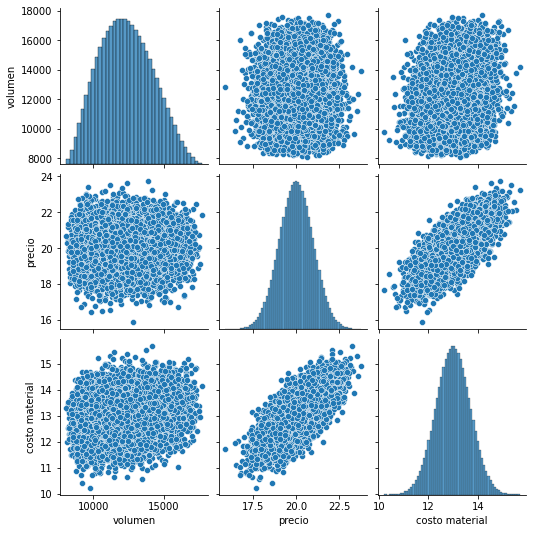

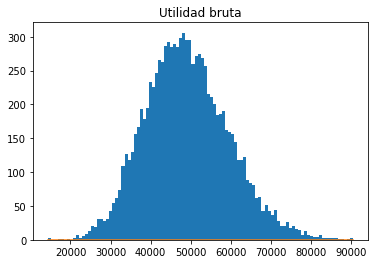

       Casos Correlacionados
count              10000.000
mean               49068.324
std                10395.019
min                14499.125
25%                41783.897
50%                48464.187
75%                55797.995
max                90489.827


In [ ]:
c_target_3 = np.array(    [[  1.0, 0,  0.2],
                        [  0,  1.0,  0.7],
                        [   0.2,  0.7,  1.0]])
GP3, rGP3, datac3=sens_mat(c_target_3)

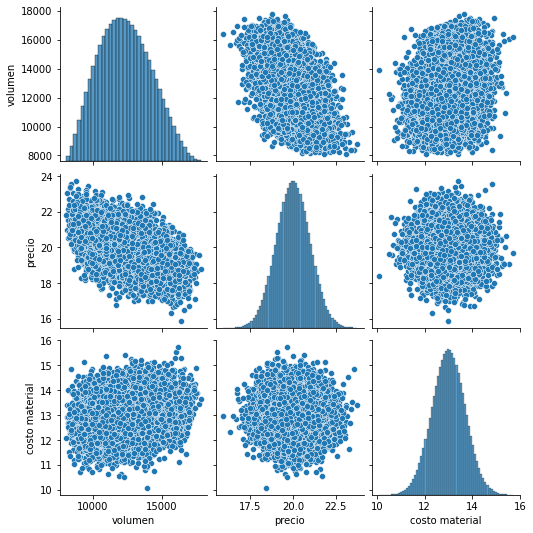

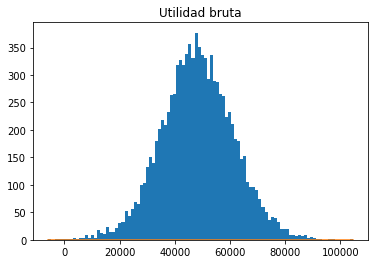

       Casos Correlacionados
count              10000.000
mean               48141.937
std                13095.481
min                -5809.991
25%                39674.218
50%                48002.446
75%                56801.738
max               104478.386


In [ ]:
c_target_4= np.array(    [[  1.0, -0.5,  0.2],
                        [  -0.5,  1.0,  0],
                        [   0.2,  0,  1.0]])
GP4, rGP4, datac4=sens_mat(c_target_4)

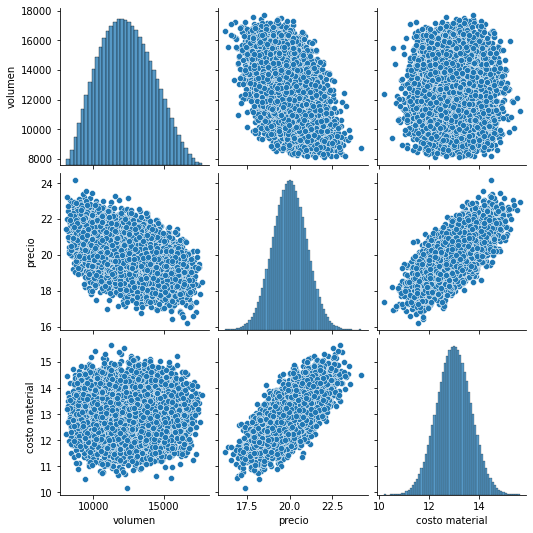

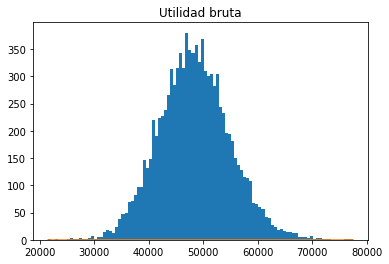

       Casos Correlacionados
count              10000.000
mean               48400.779
std                 6548.025
min                21630.423
25%                44042.869
50%                48246.892
75%                52608.945
max                77477.768


In [ ]:
c_target_5 = np.array(    [[  1.0, -0.5,  0],
                        [  -0.5,  1.0,  0.7],
                        [   0,  0.7,  1.0]])
GP5, rGP5, datac5=sens_mat(c_target_5)

In [ ]:
# comparar momentos de las variables de salida de las dos simulaciones
nombres_momentos = ["media", "desv_est", "asim", "curt"]
moments3 = [GP3.mean, GP3.std, GP3.skew, GP3.kurt]
moments4 = [GP4.mean, GP4.std, GP4.skew, GP4.kurt]
moments5 = [GP5.mean, GP5.std, GP5.skew, GP5.kurt]

df = pd.DataFrame([moments1, moments2, moments3, moments4, moments5], columns=nombres_momentos).T
df.rename(columns={0:"indep", 1:"corr1", 2:'corr2', 3:'corr3', 4:'corr4'}, inplace=True)
df["cambio 1-2"] = df["corr1"] - df["corr2"] 
df["%cambio  1-2"] = df["corr1"] / df["corr2"] 
df["cambio 1-3"] = df["corr1"] - df["corr2"] 
df["%cambio  1-3"] = df["corr1"] / df["corr2"] 
df["cambio 1-4"] = df["corr1"] - df["corr2"] 
df["%cambio 1-4"] = df["corr1"] / df["corr4"] 
df["cambio 2-3"] = df["corr2"] - df["corr3"] 
df["%cambio 2-3"] = df["corr2"] / df["corr3"] 
df["cambio 2-4"] = df["corr2"] - df["corr4"] 
df["%cambio 2-4"] = df["corr2"] / df["corr4"] 
df["cambio 3-4"] = df["corr3"] - df["corr4"] 
df["%cambio 3-4"] = df["corr3"] / df["corr4"] 
print("Impacto de la correlación en la estimación de la utilidad bruta:")
df

Impacto de la correlación en la estimación de la utilidad bruta:


,indep,corr1,corr2,corr3,corr4,cambio 1-2,%cambio 1-2,cambio 1-3,%cambio 1-3,cambio 1-4,%cambio 1-4,cambio 2-3,%cambio 2-3,cambio 2-4,%cambio 2-4,cambio 3-4,%cambio 3-4
media,49363.184,48141.386,49068.324,48141.937,48400.779,-926.939,0.981,-926.939,0.981,-926.939,0.995,926.387,1.019,667.546,1.014,-258.842,0.995
desv_est,17063.253,4203.725,10394.499,13094.826,6547.698,-6190.775,0.404,-6190.775,0.404,-6190.775,0.642,-2700.327,0.794,3846.802,1.588,6547.128,2.000
asim,0.378,-0.284,0.309,-0.018,0.161,-0.593,-0.921,-0.593,-0.921,-0.593,-1.770,0.327,-17.231,0.148,1.922,-0.179,-0.112
curt,3.255,4.094,3.088,3.307,3.323,1.006,1.326,1.006,1.326,1.006,1.232,-0.219,0.934,-0.235,0.929,-0.016,0.995


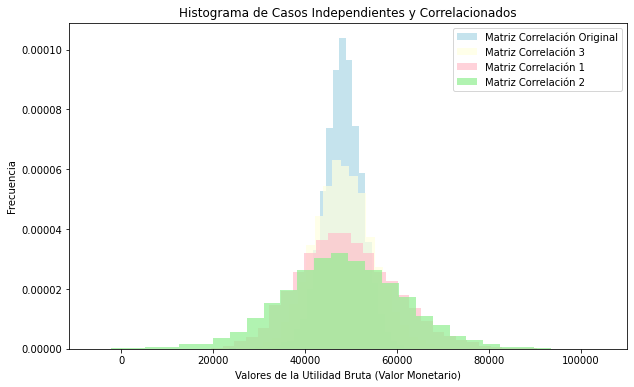

In [ ]:
# Configurar el tamaño de la figura
plt.figure(figsize=(10, 6))

# Crear histograma para casos independientes y correlacionados en la misma gráfica
plt.hist(rGP2, bins=30, color='lightblue', alpha=0.7, label='Matriz Correlación Original',density=True)
plt.hist(rGP5, bins=30, color='lightyellow', alpha=0.7, label='Matriz Correlación 3', density=True)
plt.hist(rGP3, bins=30, color='pink', alpha=0.7, label='Matriz Correlación 1', density=True)
plt.hist(rGP4, bins=30, color='lightgreen', alpha=0.7, label='Matriz Correlación 2', density=True)

# Añadir leyenda, título y etiquetas
plt.legend()
plt.title('Histograma de Casos Independientes y Correlacionados')
plt.xlabel('Valores de la Utilidad Bruta (Valor Monetario)')
plt.ylabel('Frecuencia')

# Mostrar la gráfica
plt.show()

In [ ]:
# cuantiles de la utilidad bruta:
q1 = np.array([0.001, 0.01, 0.99, 0.999])
q2 = np.arange(0.05, 0.95, 0.05)
q = np.concatenate((q1,q2))
q.sort()
xq1 = np.quantile(rGP2, q)
xq2 = np.quantile(rGP3, q)
xq3 = np.quantile(rGP4, q)
xq4 = np.quantile(rGP5, q)

qstr = [str(f'{v:.3f}') for v in q]
print("\ncuant : corr1 - corr2 - corr3 - corr4")
_ = [print("{:.3f} : {:.0f} - {:.0f} - {:.0f} - {:.0f}".format(a, xq1[i], xq2[i], xq3[i], xq4[i])) for i,a in enumerate(q)]


cuant : corr1 - corr2 - corr3 - corr4
0.001 : 30214 - 21710 - 3665 - 27477
0.010 : 37234 - 27073 - 15706 - 33849
0.050 : 41274 - 33223 - 27094 - 37894
0.100 : 42995 - 36153 - 31738 - 40267
0.150 : 44068 - 38359 - 34876 - 41693
0.200 : 44862 - 40198 - 37417 - 42953
0.250 : 45559 - 41784 - 39674 - 44043
0.300 : 46171 - 43262 - 41532 - 44933
0.350 : 46732 - 44571 - 43241 - 45850
0.400 : 47236 - 45872 - 44854 - 46693
0.450 : 47729 - 47214 - 46406 - 47462
0.500 : 48207 - 48464 - 48002 - 48247
0.550 : 48682 - 49722 - 49576 - 49057
0.600 : 49179 - 51152 - 51185 - 49852
0.650 : 49681 - 52550 - 52956 - 50723
0.700 : 50230 - 53988 - 54793 - 51661
0.750 : 50859 - 55798 - 56802 - 52609
0.800 : 51572 - 57798 - 59004 - 53677
0.850 : 52300 - 59991 - 61495 - 55029
0.900 : 53321 - 62743 - 64718 - 56809
0.990 : 57787 - 75823 - 79228 - 64945
0.999 : 60933 - 84810 - 89600 - 71325


## Punto 4

In [17]:
# matriz de correlación objetivo: volumen, precio, costo unitario de material
c_target = np.array(    [[  1.0, -0.5,  0.2],
                        [  -0.5,  1.0,  0.7],
                        [   0.2,  0.7,  1.0]])

opposite_c_target = np.array( [[  1.0,  0.5, -0.2],
                                    [   0.5,  1.0, -0.7],
                                    [  -0.2, -0.7,  1.0]])  


In [18]:
#Parametros Beta
alpha_material = 3
beta_material =2
lambda_exp=0.1

Aqui cambiamos la variable m2 a Beta con los parámetros mencionados anteriormente, también cambiamos a m2 por una exponencial con parametro 0.1

In [19]:
v2 = PERT(min, mode, max, lmb)
p2 = N(ms, ss) 
m2 = Beta(alpha_material, beta_material)
#m2=Exp(lambda_exp)
o2 = o  
         


In [20]:
# correlacionar variables de entrada 
correlate([v2, p2, m2], c_target)
#TOma las variables y la matriz de correlacion optima

In [21]:
# revisar matriz de correlación
#La que ya encontramos
c2 = correlation_matrix([v2, p2, m2])
c2

array([[ 1.   , -0.497,  0.198],
       [-0.497,  1.   ,  0.694],
       [ 0.198,  0.694,  1.   ]])

In [22]:
# desviación del objetivo
c2 - c_target

array([[ 0.   ,  0.003, -0.002],
       [ 0.003,  0.   , -0.006],
       [-0.002, -0.006,  0.   ]])

In [23]:
# cambio comparado con la c1
c2 - c1

array([[ 0.   , -0.486,  0.216],
       [-0.486,  0.   ,  0.709],
       [ 0.216,  0.709,  0.   ]])

In [24]:
GP2 = v2 * (p2 - m2 - o2)                       # utilidad bruta
R2 = v2 * p2                                    # ingresos totales
GM2 = GP2 / R2                                  # margen bruto
C2 = R2 - GP2     

In [25]:
# generación de números aleatorios
rv2 = v2._mcpts
rp2 = p2._mcpts
rm2 = m2._mcpts
rGP2 = GP2._mcpts
rR2 = R2._mcpts
rGM2 = GM2._mcpts

# arreglo
rand2 = np.vstack((rv2, rp2, rm2, rGP2, rR2, rGM2))


# dataframe
df2 = pd.DataFrame(data=rand2).T 
df2.rename(columns={ 
    0:"Volumen", 1:"Precio", 2:"Costo material", 3:"Utilidad bruta", 4:"Ingresos", 5:"Margen bruto"}, 
    inplace=True)
df2

,Volumen,Precio,Costo material,Utilidad bruta,Ingresos,Margen bruto
0,11559.293,21.909,0.933,207785.261,253247.270,0.820
1,12592.762,20.894,0.820,215005.331,263111.466,0.817
2,10225.513,21.723,0.767,183606.083,222125.562,0.827
3,11861.244,20.902,0.769,203210.814,247917.826,0.820
4,13500.501,19.404,0.594,213435.600,261962.476,0.815
...,...,...,...,...,...,...
9995,11401.456,20.326,0.622,190448.379,231747.017,0.822
9996,15004.926,18.750,0.515,228604.553,281341.814,0.813
9997,12245.363,20.666,0.787,206689.613,253068.758,0.817
9998,9704.061,22.260,0.906,178102.578,216008.166,0.825


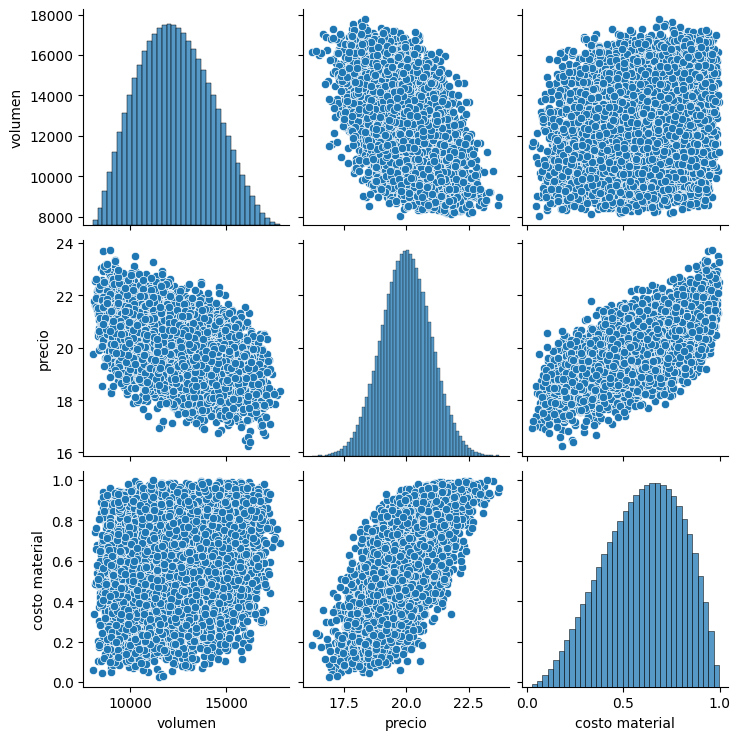

In [26]:
# plot updated data (correlated)
datac = pd.DataFrame()
datac["volumen"] = rv2
datac["precio"] = rp2
datac["costo material"] = rm2

sns.pairplot(data=datac)

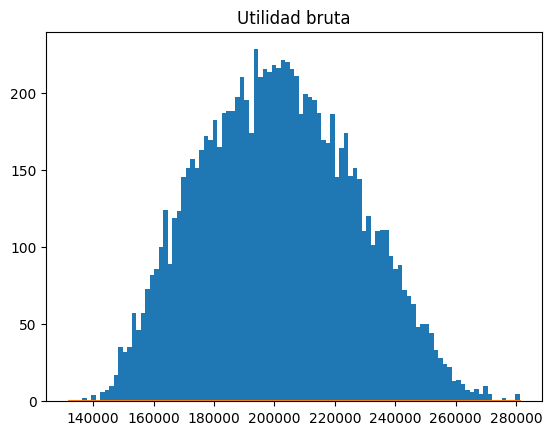

In [27]:
# histograma de utilidad bruta
plot_hist(rGP2, "Utilidad bruta")

Repetimos estos pasos con las matrices opuestas opposite_c_target y c_target y cambiamos también los parametros del beta y tenemos las gráficas en nuestro reporte.